### Description
* Please complete all the exercises in this homework in order. The main objective of the homework is to walk you through a toy problem for regression.
* The data for this homework is available in the `.db` file provided inside this folder. Please use this file to extract the data using SQL.
* Complete the exercises by filling in each code cell below. No need to create a separate file. Simply add your code to each cell and then run it.
* Once you complete your homework, please upload the notebook to your forked repo.
* Deadline: 15 Nov 2021 @ 23.59.59 EEST

#### Step 1 - Connect to the SQLite database using sqlite3

In [2]:
# Your code goes here

import sqlite3
conn = sqlite3.connect("homework4.db")

#### Step 2 - Load the data using pandas.read_sql()
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html

In [3]:
# Your code goes here

import pandas as pd
data=pd.read_sql("SELECT * FROM homework4;", conn)

#### Step 3 - Explore the data
Before building a model, check out your data and ensure that it is clean. Things you should be careful about include:

* null or missing values
* unmatched data types
* anomalies (very large or very small values)

Please note that your data set is a modified version of the data available here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      884 non-null    int64  
 1   age     884 non-null    float64
 2   sex     884 non-null    float64
 3   bmi     884 non-null    float64
 4   bp      884 non-null    float64
 5   s1      884 non-null    float64
 6   s2      884 non-null    float64
 7   s3      884 non-null    float64
 8   s4      884 non-null    float64
 9   s5      884 non-null    float64
 10  s6      884 non-null    float64
 11  target  884 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 83.0 KB


In [5]:
# Your code goes here
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      884 non-null    int64  
 1   age     884 non-null    float64
 2   sex     884 non-null    float64
 3   bmi     884 non-null    float64
 4   bp      884 non-null    float64
 5   s1      884 non-null    float64
 6   s2      884 non-null    float64
 7   s3      884 non-null    float64
 8   s4      884 non-null    float64
 9   s5      884 non-null    float64
 10  s6      884 non-null    float64
 11  target  884 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 83.0 KB


In [5]:
nulls_number = data.isnull().sum()
print(nulls_number)

id        0
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
data.isna().sum()

id        0
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [8]:
duplicates = data[data.duplicated(['age', 'sex', 'bmi', 'bp', 's1', "s2", "s3", "s4", "s5", "s6", "target"])]
print(duplicates)

      id       age       sex       bmi        bp        s1        s2  \
442  443  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
443  444 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
444  445  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
445  446 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
446  447  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   
..   ...       ...       ...       ...       ...       ...       ...   
879  880  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566   
880  881 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165   
881  882  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840   
882  883 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283   
883  884 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809   

           s3        s4        s5        s6  target  
442 -0.043401 -0.002592  0.019908 -0.017646   151.0  
443  0.074412 -0.039493 -0.

Please provide a description of your findings below:

* Finding 1:

In [9]:
#Your code goes here:

new_data = data.drop_duplicates(subset=["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6", "target"])
print(len(new_data))

442


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'s1'}>],
       [<AxesSubplot:title={'center':'s2'}>,
        <AxesSubplot:title={'center':'s3'}>,
        <AxesSubplot:title={'center':'s4'}>],
       [<AxesSubplot:title={'center':'s5'}>,
        <AxesSubplot:title={'center':'s6'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

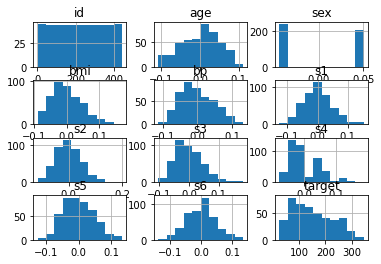

In [10]:
import numpy as np
%matplotlib inline
new_data.hist()

In [11]:
new_data.describe()


,id,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,221.500000,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,127.738666,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,1.000000,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,111.250000,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,221.500000,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,331.750000,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,442.000000,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [12]:
Q1 = new_data.quantile(q=0.25)
Q3 = new_data.quantile(q=0.75)
IQR = Q3 - Q1
upper_limit1 = Q3 + 1.5 * IQR
upper_limit1

id        662.500000
age         0.151139
sex         0.193663
bmi         0.129464
bp          0.144094
s1          0.122267
s2          0.120149
s3          0.125954
s4          0.145012
s5          0.130956
s6          0.119561
target    398.250000
dtype: float64

In [13]:
lower_limit1 = Q1 - 1.5 * IQR
lower_limit1

id       -219.500000
age        -0.150362
sex        -0.187624
bmi        -0.132445
bp         -0.145107
s1         -0.128157
s2         -0.120663
s3         -0.131760
s4         -0.150197
s5         -0.131772
s6         -0.124823
target    -99.750000
dtype: float64

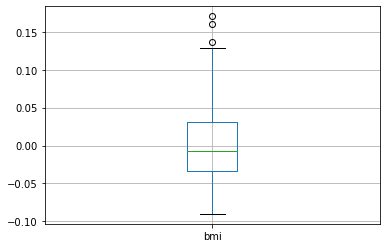

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = new_data.boxplot(column=["bmi"]) 


    

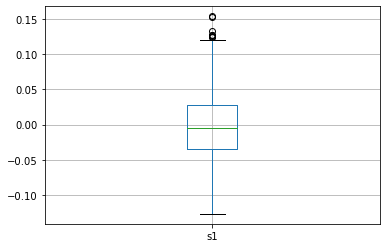

In [15]:
fig2 = new_data.boxplot(column=["s1"])

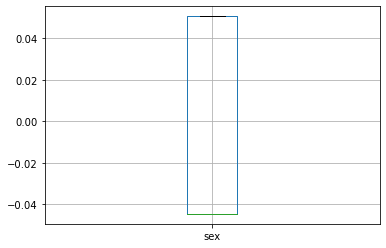

In [16]:
fig2 = new_data.boxplot(column=["sex"])

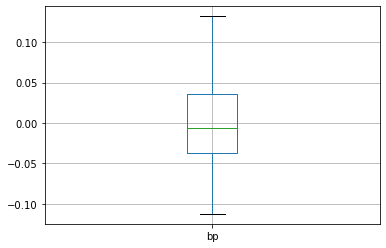

In [17]:
fig2 = new_data.boxplot(column=["bp"])

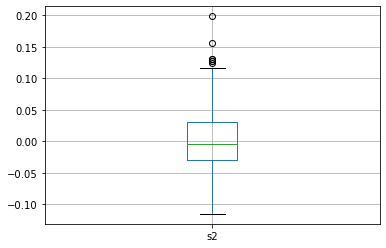

In [18]:
fig2 = new_data.boxplot(column=["s2"])

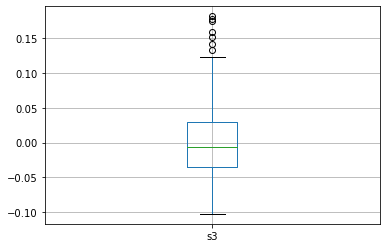

In [19]:
fig2 = new_data.boxplot(column=["s3"])

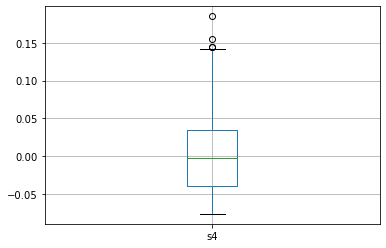

In [20]:
fig2 = new_data.boxplot(column=["s4"])

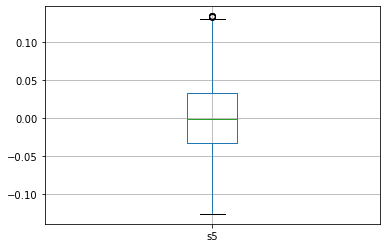

In [21]:
fig2 = new_data.boxplot(column=["s5"])

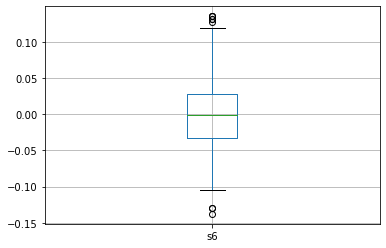

In [22]:
fig2 = new_data.boxplot(column=["s6"])

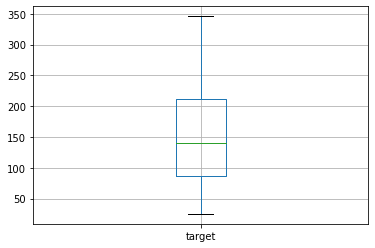

In [23]:
fig2 = new_data.boxplot(column=["target"])

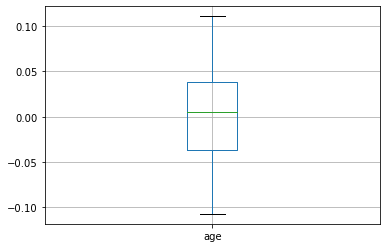

In [24]:
fig2 = new_data.boxplot(column=["age"])

In [ ]:
"""id        662.500000
age         0.151139
sex         0.193663
bmi         0.129464
bp          0.144094
s1          0.122267
s2          0.120149
s3          0.125954
s4          0.145012
s5          0.130956
s6          0.119561
target    398.250000
dtype: float64"""

"""id       -219.500000
age        -0.150362
sex        -0.187624
bmi        -0.132445
bp         -0.145107
s1         -0.128157
s2         -0.120663
s3         -0.131760
s4         -0.150197
s5         -0.131772
s6         -0.124823
target    -99.750000
dtype: float64"""

#### Step 4 - Clean your data

* Remove null or missing values
* Clean data types
* Remove outliers

In [32]:
new_data = new_data.drop(new_data.index[new_data["bmi"] >= 0.129464])


In [33]:
new_data = new_data.drop(new_data.index[new_data["bmi"] <= -0.132445])

In [34]:
new_data = new_data.drop(new_data.index[new_data["s1"] >= 0.122267])

In [35]:
new_data = new_data.drop(new_data.index[new_data["s1"] <= -0.128157])

In [36]:
new_data = new_data.drop(new_data.index[new_data["s2"] >= 0.120149])

In [37]:
new_data = new_data.drop(new_data.index[new_data["s2"] <= -0.120663])

In [38]:
new_data = new_data.drop(new_data.index[new_data["s3"] >= 0.125954])

In [39]:
new_data = new_data.drop(new_data.index[new_data["s4"] >= 0.145012])

In [60]:
new_data = new_data.drop(new_data.index[new_data["s5"] >=  0.130956])


In [59]:
new_data = new_data.drop(new_data.index[new_data["s6"] >=  0.119561])

In [61]:
new_data = new_data.drop(new_data.index[new_data["s6"] <=  -0.124823])

In [62]:
new_data

,id,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,2,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,3,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,5,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
436,437,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,438,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,439,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,440,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


<AxesSubplot:>

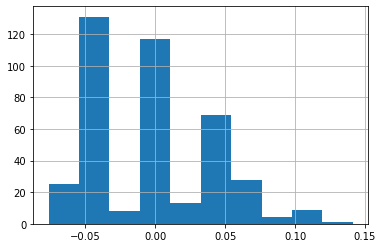

In [63]:
new_data["s4"].hist()

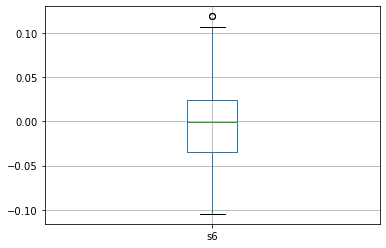

In [71]:
fig=new_data.boxplot(column=["s6"])

In [72]:
#another way for detecting outliers:

standard_deviation = new_data.std()
mean = new_data.mean()
upper_limit2 = mean + 3 * standard_deviation
upper_limit2

id        604.988885
age         0.144483
sex         0.142964
bmi         0.134793
bp          0.138984
s1          0.126069
s2          0.129446
s3          0.128641
s4          0.124469
s5          0.127318
s6          0.129779
target    373.231272
dtype: float64

In [73]:
lower_limit2 = mean - 3 * standard_deviation
lower_limit2

id       -167.561725
age        -0.145395
sex        -0.142809
bmi        -0.138566
bp         -0.140351
s1         -0.135533
s2         -0.134468
s3         -0.130547
s4         -0.131420
s5         -0.135127
s6         -0.134819
target    -76.199174
dtype: float64

In [18]:
new_data = new_data.drop(new_data.index[new_data["s6"] >= 0.129779])
new_data

,id,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,2,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,3,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,5,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
436,437,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,438,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,439,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,440,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


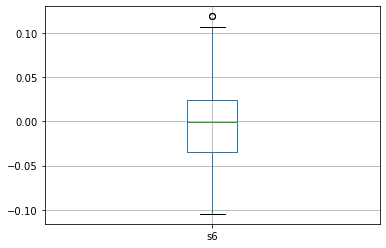

In [76]:
fig=new_data.boxplot(column=["s6"])

In [20]:
#Another round of data cleaning
cols=["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6", "target"]
new_data = new_data[~((new_data[cols] < (Q1 - 1.5 * IQR)) |(new_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-20-7671e0ba3b50>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_data = new_data[~((new_data[cols] < (Q1 - 1.5 * IQR)) |(new_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-20-7671e0ba3b50>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_data = new_data[~((new_data[cols] < (Q1 - 1.5 * IQR)) |(new_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [21]:
new_data

,id,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,2,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,3,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,5,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
436,437,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,438,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,439,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,440,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


#### Step 5 - Split your dataset into a training and test data set using scikit-learn's train_test_split() method

In [6]:
# Your code goes here
data.reset_index(inplace=True)
data.set_index("id", inplace = True) 

#### Step 6 - Develop a class that accepts X, y on the constructor and implements the functionality highlighted below. 

* The constructor takes in a matrix, X, with the observations (independent variables) and the target, y, (dependent variable)
* Has a method fit where it trains THREE different regressors
* Reports the average of all predictors as the final target value 
* Can compute the MSE and MAE for any prediction
* Has a method predict that can be used to predict the target variable for unseen data. The final prediction is an
average off the values predicted by the regressors
* (Optional) Extend the class to use an arbitrary number of regressors 

In [10]:
# Implement the methods below + add any methods you think are necessary to create this Regressor class
class Regressor:
    def __init__(self, X, y):
        pass 
    
    def fit(self, *args, **kwargs):
        pass 
    
    def predict(self, *args, **kwargs):
        pass 
    
    def mse(self, *args, **kwargs):
        pass
    
    def mae(self, *args, **kwargs):
        pass

#### Step 7 - Train a Regressor on the data provided using the class you created

In [16]:
# Your code goes here

#### Step 8 - Validate the regressors MAE and MSE on the training set

In [17]:
# Your code goes here

#### Step 9 - Validate the regressor's MAE and MSE on the test set

In [18]:
# Your code goes here

#### Step 10 - What conclusions can you draw from the MSE and MAE? 
* Is your model accurately predicting the target?
* Do you think you are overfitting?
* Do you think your model is biased?
* What could you do to improve your regressor's predictive power?

In [19]:
# Your code goes here

#### Step 11 - Visualise your data (optional)

Your data is multi-dimensional. Can you think of a way to visualise the data and the regressor results? 

In [21]:
# Your code goes here